In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./Downloads/wine-reviews/winemag-data_first150k.csv')

In [5]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
countries = data["country"].value_counts()
countries

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [16]:
def isGood(points):
    if points > 90:
        return True
    else:
        return False

In [17]:
data['good_wine'] = data['points'].map(isGood)

In [21]:
data.groupby('good_wine').count()["description"]

good_wine
False    118693
True      32237
Name: description, dtype: int64

Text(0.5,1,'Percent Good')

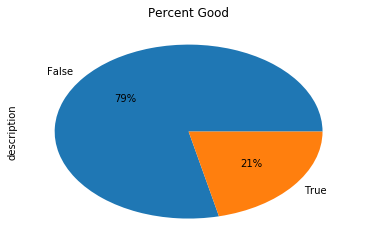

In [18]:
data.groupby('good_wine').count()['description'].plot.pie(autopct='%1.0f%%')
plt.title("Percent Good")

In [22]:
sample = data[data.good_wine].sample(32237)

In [23]:
sample = sample.append(data[~data.good_wine].sample(32237))

In [25]:
sample.groupby('good_wine').count()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
good_wine,,,,,,,,,,,
False,32237,32237,32237,21351,32237,29658,32237,26396,12804,32237,32237
True,32237,32237,32237,25981,32237,28048,32237,28569,14260,32237,32237


In [26]:
from nltk.tokenize import wordpunct_tokenize
import re
from nltk.corpus import stopwords

In [27]:
# These are boring, filler words -- things like 'a', 'the', 'we', etc
stopwords = stopwords.words('english')

In [28]:
sample = sample.reset_index()

In [31]:
def tokenize(description):
    
    description = description.lower() # make everything lowercase
    
    # wordpunct_tokenize splits words by spaces or punctation, and returns an array of words
    description = wordpunct_tokenize(description)
    
    # remove the stopwords
    return [x for x in description if not x in stopwords]

In [32]:
sample['tokens'] = sample['description'].map(tokenize) # This could take a while...

In [33]:
def getFrequencies(df):
    df = df['tokens'].map(set).map(list) # going from a list to a set to a list means we drop duplicates
    df = df.sum() # Concatenates all the tokens. warning: THIS COULD TAKE A LONG TIME
    return pd.Series(df).value_counts() # Value counts tells us how many users used a given word

In [36]:
good_frequencies = getFrequencies(sample[sample.good_wine])

In [37]:
bad_frequencies = getFrequencies(sample[~sample.good_wine])

In [38]:
good_frequencies.head(20)

.          32237
,          31963
wine       19108
'          14817
flavors    14050
-          13366
fruit      12701
tannins     9406
rich        7701
black       7558
acidity     7433
ripe        7382
finish      6816
cherry      6760
years       6327
drink       6260
spice       6070
aromas      5895
oak         5193
palate      5171
dtype: int64

In [39]:
frequenices = pd.DataFrame(good_frequencies, columns=['good_count'])

In [41]:
frequencies = frequenices.join(pd.DataFrame(bad_frequencies, columns=['bad_count'])).fillna(0)

In [42]:
frequencies = frequencies / 32237 * 100 # Let's look at percentages instead of raw counts

In [44]:
# The most interesting words are the ones where the difference in percentage usage is the highest
frequencies['difference'] = frequencies['good_count'] - frequencies['bad_count']

In [45]:
# Words used more by good wines than bad wines
frequencies.sort_values('difference').tail(25)

,good_count,bad_count,difference
concentrated,7.494494,2.587089,4.907405
elegant,8.235878,3.319167,4.916711
powerful,6.489438,1.519993,4.969445
aging,7.615473,2.463008,5.152465
spice,18.829296,13.614790,5.214505
chocolate,12.069982,6.818252,5.251729
firm,9.960604,4.659242,5.301362
dense,7.848125,2.521947,5.326178
delicious,8.521264,2.943822,5.577442
fine,9.805503,4.107082,5.698421


In [46]:
# Words used more by bad wines than good wines
frequencies.sort_values('difference').head(25)

,good_count,bad_count,difference
flavors,43.583460,51.202035,-7.618575
aromas,18.286441,25.234978,-6.948537
light,3.120638,8.139715,-5.019077
finish,21.143407,26.150076,-5.006669
good,7.240128,12.045165,-4.805038
soft,7.742656,12.544592,-4.801936
simple,0.269876,4.885690,-4.615814
fresh,7.928777,12.138226,-4.209449
bit,2.549865,6.728294,-4.178429
palate,16.040574,20.001861,-3.961287
